# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities

['kapuskasing',
 'yar-sale',
 'cape town',
 'mar del plata',
 'arraial do cabo',
 'albany',
 'saint george',
 'atbasar',
 'verkhnyaya inta',
 'mahebourg',
 'itarema',
 'ancud',
 'muros',
 'tiksi',
 'busselton',
 'skagastrond',
 'cayenne',
 'hofn',
 'tsihombe',
 'qaanaaq',
 'rochelle',
 'avarua',
 'mataura',
 'ushuaia',
 'moranbah',
 'hermanus',
 'bluff',
 'shubarshi',
 'tuatapere',
 'santo angelo',
 'dikson',
 'ishinomaki',
 'kapaa',
 'moron',
 'codrington',
 'rikitea',
 'hobart',
 'saskylakh',
 'los llanos de aridane',
 'pangnirtung',
 'altay',
 'nouadhibou',
 'lasa',
 'calderitas',
 'kindu',
 'kavieng',
 'rungata',
 'vaini',
 'norman wells',
 'georgetown',
 'dunedin',
 'kerki',
 'yerbogachen',
 'llangefni',
 'susurluk',
 'butaritari',
 'parana',
 'coihaique',
 'kolokani',
 'new norfolk',
 'ponta do sol',
 'torbay',
 'samusu',
 'taoudenni',
 'abbeville',
 'samdari',
 'hasaki',
 'punta arenas',
 'barstow',
 'nanakuli',
 'paamiut',
 'port alfred',
 'terekli-mekteb',
 'poltava',
 'llanes

In [4]:
cities_pd_uncap = pd.DataFrame({"City":cities})
cities_pd = cities_pd_uncap.sort_values("City",ascending=True)['City'].str.capitalize()
cities_pd.head()

64     Abbeville
484    Abu dhabi
139     Acapulco
214       Acheng
474    Acquaviva
Name: City, dtype: object

In [5]:
indexes=list(range(0,len(cities_pd)))

In [6]:
cities1 = pd.DataFrame(cities_pd, index=indexes, columns=["City"])
cities1

,City
0,Kapuskasing
1,Yar-sale
2,Cape town
3,Mar del plata
4,Arraial do cabo
...,...
575,Caravelas
576,Kabinda
577,Aksu
578,Manicore


In [7]:
cities1["Cloudiness"] =""
cities1["Country"] = ""
cities1["Date"] = ""
cities1["Humidity"] = ""
cities1["Lat"] = ""
cities1["Lng"] = ""
cities1["Max Temp"] = ""
cities1["Wind Speed"] = ""

cities1

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapuskasing,,,,,,,,
1,Yar-sale,,,,,,,,
2,Cape town,,,,,,,,
3,Mar del plata,,,,,,,,
4,Arraial do cabo,,,,,,,,
...,...,...,...,...,...,...,...,...,...
575,Caravelas,,,,,,,,
576,Kabinda,,,,,,,,
577,Aksu,,,,,,,,
578,Manicore,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f'{url}appid={weather_api_key}&units=metric&q={cities1.loc[2,"City"]}'

In [9]:
response=requests.get(query_url).json()
response

{'coord': {'lon': 18.42, 'lat': -33.93},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 15.86,
  'feels_like': 13.8,
  'temp_min': 15,
  'temp_max': 17.78,
  'pressure': 1012,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 4.6, 'deg': 330},
 'clouds': {'all': 75},
 'dt': 1603845958,
 'sys': {'type': 1,
  'id': 1899,
  'country': 'ZA',
  'sunrise': 1603856961,
  'sunset': 1603905037},
 'timezone': 7200,
 'id': 3369157,
 'name': 'Cape Town',
 'cod': 200}

In [ ]:
params = {"appid":weather_api_key}
base_url = "http://api.openweathermap.org/data/2.5/weather?"

responses = []
params
for i, row in cities1.iterrows():
    params["q"] = {row['City']}
    response = requests.get(base_url, params=params).json()
    responses.append(response)

In [11]:
print("Beginning Data Retrieval")  
print("------------------------")         
for i,row in cities1.iterrows():  
    try:
        print(f"Processing Record {i} {responses[i]['id']} |{responses[i]['name']}")      
        cities1.loc[i,"Cloudiness"]=responses[i]["clouds"]["all"]
        cities1.loc[i,"Country"]=responses[i]["sys"]["country"]
        cities1.loc[i,"Date"]=responses[i]["dt"]
        cities1.loc[i,"Humidity"] = responses[i]["main"]["humidity"]
        cities1.loc[i,"Lat"] = responses[i]["coord"]["lat"]
        cities1.loc[i,"Lng"]= responses[i]["coord"]["lon"]
        cities1.loc[i,"Max Temp"] = responses[i]["main"]["temp_max"]
        cities1.loc[i,"Wind Speed"] = responses[i]["wind"]["speed"]
                
    except:
        print(f"{row['City']} city not found! Skipping...")

Beginning Data Retrieval
------------------------
Processing Record 0 5989403 |Kapuskasing
Processing Record 1 1486321 |Yar-Sale
Processing Record 2 3369157 |Cape Town
Processing Record 3 3430863 |Mar del Plata
Processing Record 4 3471451 |Arraial do Cabo
Processing Record 5 5106841 |Albany
Processing Record 6 5546220 |Saint George
Processing Record 7 1526038 |Atbasar
Processing Record 8 1487332 |Verkhnyaya Inta
Processing Record 9 934322 |Mahébourg
Processing Record 10 3393692 |Itarema
Processing Record 11 3899695 |Ancud
Processing Record 12 3115824 |Muros
Processing Record 13 2015306 |Tiksi
Processing Record 14 2075265 |Busselton
Skagastrond city not found! Skipping...
Processing Record 16 3382160 |Cayenne
Processing Record 17 2630299 |Hofn
Tsihombe city not found! Skipping...
Processing Record 19 3831208 |Qaanaaq
Processing Record 20 3006783 |Arrondissement de La Rochelle
Processing Record 21 4035715 |Avarua
Processing Record 22 6201424 |Mataura
Processing Record 23 3833367 |Ushuaia

Processing Record 295 2142316 |Yeppoon
Processing Record 296 2303611 |Esim
Processing Record 297 1853174 |Sakaiminato
Labutta city not found! Skipping...
Kachikau city not found! Skipping...
Processing Record 300 110690 |Faya
Tuggurt city not found! Skipping...
Processing Record 302 4726521 |San Patricio
Processing Record 303 3670218 |San Andrés
Processing Record 304 1521351 |Kazygurt
Processing Record 305 4036284 |Alofi
Processing Record 306 4031742 |Egvekinot
Processing Record 307 934479 |Grand Gaube
Processing Record 308 3404558 |Cabedelo
Processing Record 309 286621 |Salalah
Processing Record 310 2344415 |Duku
Kamenskoye city not found! Skipping...
Processing Record 312 3052417 |Galgamácsa
Processing Record 313 769250 |Kielce
Processing Record 314 1583992 |Turan
Lolua city not found! Skipping...
Processing Record 316 1261853 |Narasannapeta
Processing Record 317 3492627 |El Batey
Processing Record 318 1719274 |Candelaria
Processing Record 319 1735799 |Sri Aman
Processing Record 320 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
cities1

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapuskasing,75,CA,1603846223,74,49.42,-82.43,272.15,6.7
1,Yar-sale,0,RU,1603846223,92,66.83,70.83,256.54,2.87
2,Cape town,75,ZA,1603845958,87,-33.93,18.42,290.93,4.6
3,Mar del plata,0,AR,1603846213,87,-38,-57.56,288.15,3.1
4,Arraial do cabo,0,BR,1603846224,94,-22.97,-42.03,296.15,6.2
...,...,...,...,...,...,...,...,...,...
575,Caravelas,100,BR,1603846307,90,-17.71,-39.25,298.25,4.71
576,Kabinda,78,CD,1603846307,93,-6.13,24.48,292.9,0.64
577,Aksu,100,CN,1603846307,58,41.12,80.26,278.16,1.2
578,Manicore,60,BR,1603846308,92,-5.81,-61.3,296.83,1.17


In [13]:
cities1['Country'].replace('', np.nan, inplace=True)
cities1

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapuskasing,75,CA,1603846223,74,49.42,-82.43,272.15,6.7
1,Yar-sale,0,RU,1603846223,92,66.83,70.83,256.54,2.87
2,Cape town,75,ZA,1603845958,87,-33.93,18.42,290.93,4.6
3,Mar del plata,0,AR,1603846213,87,-38,-57.56,288.15,3.1
4,Arraial do cabo,0,BR,1603846224,94,-22.97,-42.03,296.15,6.2
...,...,...,...,...,...,...,...,...,...
575,Caravelas,100,BR,1603846307,90,-17.71,-39.25,298.25,4.71
576,Kabinda,78,CD,1603846307,93,-6.13,24.48,292.9,0.64
577,Aksu,100,CN,1603846307,58,41.12,80.26,278.16,1.2
578,Manicore,60,BR,1603846308,92,-5.81,-61.3,296.83,1.17


In [14]:
cities1.dropna(subset=['Country'], inplace=True)
cities1.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapuskasing,75,CA,1603846223,74,49.42,-82.43,272.15,6.7
1,Yar-sale,0,RU,1603846223,92,66.83,70.83,256.54,2.87
2,Cape town,75,ZA,1603845958,87,-33.93,18.42,290.93,4.6
3,Mar del plata,0,AR,1603846213,87,-38,-57.56,288.15,3.1
4,Arraial do cabo,0,BR,1603846224,94,-22.97,-42.03,296.15,6.2


In [15]:
cities1.to_csv(output_data_file, index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [16]:
import datetime
timestamp = datetime.datetime.fromtimestamp(cities1.loc[0,"Date"])
current_date = timestamp.strftime('%Y-%m-%d')
print(current_date)

2020-10-27


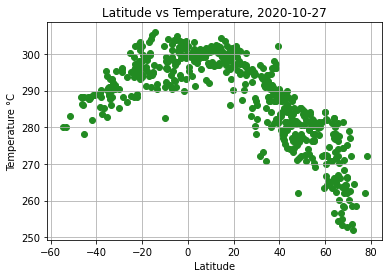

In [17]:
plt.scatter(x=cities1["Lat"], y=cities1["Max Temp"], color="forestgreen")
plt.xlabel("Latitude")
plt.ylabel("Temperature °C")
plt.title(f"Latitude vs Temperature, {current_date}")
plt.grid(True)
plt.savefig("../output_data/Scatter1.png")
plt.show()

#### Latitude vs. Humidity Plot

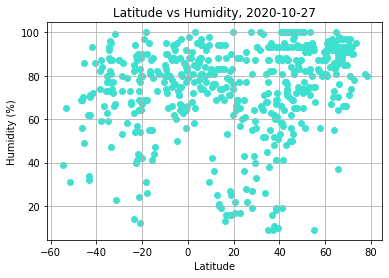

In [18]:
plt.scatter(x=cities1["Lat"], y=cities1["Humidity"], color="turquoise")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs Humidity, {current_date}")
plt.grid(True)
plt.savefig("../output_data/Scatter2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

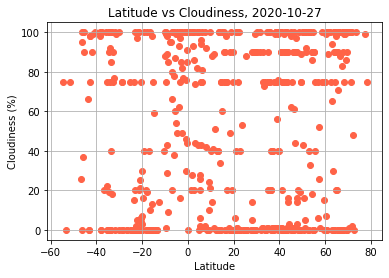

In [19]:
plt.scatter(x=cities1["Lat"], y=cities1["Cloudiness"], color="tomato")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs Cloudiness, {current_date}")
plt.grid(True)
plt.savefig("../output_data/Scatter3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

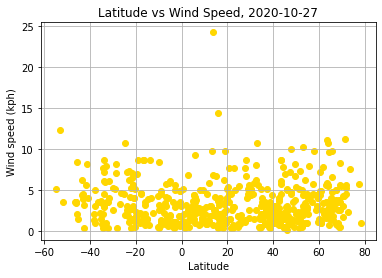

In [20]:
plt.scatter(x=cities1["Lat"], y=cities1["Wind Speed"], color="gold")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (kph)")
plt.title(f"Latitude vs Wind Speed, {current_date}")
plt.grid(True)
plt.savefig("../output_data/Scatter4.png")
plt.show()

## Linear Regression

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots

In [23]:
# Create Northern and Southern Hemisphere DataFrames
cities2= cities1.copy()
cities2

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapuskasing,75,CA,1603846223,74,49.42,-82.43,272.15,6.7
1,Yar-sale,0,RU,1603846223,92,66.83,70.83,256.54,2.87
2,Cape town,75,ZA,1603845958,87,-33.93,18.42,290.93,4.6
3,Mar del plata,0,AR,1603846213,87,-38,-57.56,288.15,3.1
4,Arraial do cabo,0,BR,1603846224,94,-22.97,-42.03,296.15,6.2
...,...,...,...,...,...,...,...,...,...
575,Caravelas,100,BR,1603846307,90,-17.71,-39.25,298.25,4.71
576,Kabinda,78,CD,1603846307,93,-6.13,24.48,292.9,0.64
577,Aksu,100,CN,1603846307,58,41.12,80.26,278.16,1.2
578,Manicore,60,BR,1603846308,92,-5.81,-61.3,296.83,1.17


In [24]:
northern = cities2.loc[cities2["Lat"]>=0]
northern

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapuskasing,75,CA,1603846223,74,49.42,-82.43,272.15,6.7
1,Yar-sale,0,RU,1603846223,92,66.83,70.83,256.54,2.87
5,Albany,100,US,1603846224,77,42.6,-73.97,281.48,0.76
6,Saint george,1,US,1603846224,9,37.1,-113.58,289.15,2.22
7,Atbasar,100,KZ,1603846224,93,51.8,68.33,270.77,7.36
...,...,...,...,...,...,...,...,...,...
569,Sabang,96,ID,1603846306,74,5.89,95.32,300.92,9.34
573,Filiatra,40,GR,1603846307,82,37.15,21.58,290.93,3.31
574,Nola,20,IT,1603846307,87,40.92,14.53,287.04,2.1
577,Aksu,100,CN,1603846307,58,41.12,80.26,278.16,1.2


In [25]:
southern = cities2.loc[cities2["Lat"]<=0]
southern

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Cape town,75,ZA,1603845958,87,-33.93,18.42,290.93,4.6
3,Mar del plata,0,AR,1603846213,87,-38,-57.56,288.15,3.1
4,Arraial do cabo,0,BR,1603846224,94,-22.97,-42.03,296.15,6.2
9,Mahebourg,4,MU,1603846224,80,-20.41,57.7,294.26,1.34
10,Itarema,100,BR,1603846225,81,-2.92,-39.92,298.83,4.98
...,...,...,...,...,...,...,...,...,...
562,Santa cruz,0,BO,1603846241,69,-17.8,-63.17,299.15,4.6
570,Rundu,19,NA,1603846306,26,-17.93,19.77,295.26,2.14
575,Caravelas,100,BR,1603846307,90,-17.71,-39.25,298.25,4.71
576,Kabinda,78,CD,1603846307,93,-6.13,24.48,292.9,0.64


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [38]:
# import scipy.stats as st

# min_lat = southern["Lat"].min()
# max_lat = northern["Lat"].max()

# (slope,intercept,rvalue,pvalue,stderr)= st.linregress(northern["Lat"], northern["Max Temp"])
# r_square = rvalue**2

# x_values = northern["Lat"]

# regression_values = x_values*slope+intercept

# linear_eq = (f'y={round(slope,2)}x+{round(intercept,2)}')

# northern.plot(kind="scatter", x="Lat", y="Max Temp")
# plt.plot(x_values, regression_values, color="red", linestyle="solid", linewidth=0.5)
# plt.annotate(linear_eq, (10, -10), fontsize=15, color="red")
# plt.title(f"Northern Hemisphere Latitude vs Temperature, {current_date}")
# print(f'r^2 value: {round(r_square,4)}')
# plt.savefig("../output_data/LinReg1.png")
# plt.show()

In [40]:
from scipy import stats

In [41]:
# Define a function for linear regressions
def lin_reg (x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
    regress_values =x_values*slope+intercept
    line_eq = "y="+str(round(slope,2))+"x+"+str(round(intercept,2))
    print(line_eq)
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,'r')
    print(f" The r squared value is : {rvalue**2}")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')

In [42]:
# function = lin_reg(southern["Lat"], southern["Max Temp"])
# annotate(function, 10, 270)
# plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
# # plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# plt.xlabel("Latitude")
# plt.ylabel("Max Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [44]:
# function= lin_reg(southern["Lat"],southern["Max Temp"])
# # annotate(function,-50,305)
# plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
# #plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# plt.xlabel("Latitude")
# plt.ylabel("Max Temp")

##### The closer to the center of the Earth, the higher the maximum temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [43]:
# function= lin_reg(northern["Lat"],northern["Humidity"])
# annotate(function,40,15)
# # plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
# plt.xlabel("Latitude")
# plt.ylabel("Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# function= lin_reg(southern["Lat"],southern["Humidity"])
# annotate(function,-40,50)
# plt.title("Southern Hemisphere -Humidity(%) vs. Latitude Linear Regression")
# #plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# plt.xlabel("Latitude")
# plt.ylabel("Humidity")

##### There's no significant correlation between the latitude and humidity of the cities.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [46]:
# function= lin_reg(northern["Lat"],northern["Cloudiness"])
# annotate(function,0,0)
# plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
# #plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# plt.xlabel("Latitude")
# plt.ylabel("Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# function= lin_reg(southern["Lat"],southern["Cloudiness"])
# annotate(function,-40,50)
# plt.title("Southern Hemisphere -Cloudiness vs. Latitude Linear Regression")
# #plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# plt.xlabel("Latitude")
# plt.ylabel("Cloudiness")

##### There's no significant correlation between the latitude and cloudiness of the cities.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# function= lin_reg(northern["Lat"],northern["Wind Speed"])
# annotate(function,40,15)
# plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
# plt.xlabel("Latitude")
# plt.ylabel("Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [47]:
# function = lin_reg(southern["Lat"],southern["Wind Speed"])
# annotate(function,40,50)
# plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
# #plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# plt.xlabel("Latitude")
# plt.ylabel("Wind Speed")

##### The wind speed in the northern hemisphere is significantly lower, and in the souther, the tendency seems to be that it slightly decreases as the city goes nearer to the center.